In [148]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp

In [149]:
s = 0.2
N = 50
R = 50
num_points = 1000

### Basic plots

In [150]:
def Lattice(l=1,l0=[0,0],t0=0,N=3):
    '''Return an array of x coordinates and y coordinates that create a hexagonal lattice
      of N^2 points of length l, rotated by theta t0 and displaced by l0  '''
    mlist = np.linspace(-N,N,2*N+1)
    nlist = np.linspace(-N,N,2*N+1)
    m,n = np.meshgrid(mlist,nlist)
    a0 = np.array([(3**0.5)/2,1/2]) *l
    b0 = np.array([(3**0.5)/2,-1/2]) *l

    # apply rotation
    theta = np.radians(t0)
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c, -s), (s, c)))
    a,b = R@a0 + l0[0], R@b0 + l0[1]
    X = a[0]*m + b[0]*n
    Y = a[1]*m + b[1]*n
    return X,Y

In [151]:
# def diff_func(x, y, X, Y, dt = 2, s=1):
#     '''A function that shows the difference in activation at difference in angle of dt'''

#     exponent1 = (np.subtract.outer(X,x))**2  + (np.subtract.outer(Y,y))**2 \
#                 - 2*np.sin(dt)*( np.multiply.outer(Y,x) - np.multiply.outer(X,y) ) \
#                 + 2*(1-np.cos(dt))*( np.multiply.outer(X,x) + np.multiply.outer(Y,y) )
#     explat1 = np.exp(exponent1 / (-2*(s**2)))               # lattice of exponents

#     exponent2 = (np.subtract.outer(X,x))**2  + (np.subtract.outer(Y,y))**2
#     # print(exponent2)
#     explat2 = np.exp(exponent2 / (-2*(s**2)))               # lattice of exponents

#     return np.sum( explat1 - explat2 , axis=(0,1))

In [152]:
def GaussLattice(x,y,X,Y,s=1):
    ''' A function with periodic Gaussians centered at X,Y lattice'''
    exponent = (np.subtract.outer(X,x))**2  + (np.subtract.outer(Y,y))**2
    # print(exponent.shape)
    explat = np.exp(exponent / (-2*(s**2)))     # lattice of exponentials
    return np.sum(explat, axis=(0,1))

In [153]:
def diff_func(x, y, X, Y, dt = 2, s=1):
    '''A function that shows the difference in activation at difference in angle of dt'''
    dt = np.radians(dt)
    exponent1 = np.multiply.outer(np.ones_like(X),x)**2 + np.multiply.outer(np.ones_like(Y),y)**2 \
                + np.multiply.outer(X,np.ones_like(x))**2 + np.multiply.outer(Y,np.ones_like(y))**2 \
                + 2*np.sin(dt)*( np.multiply.outer(Y,x) - np.multiply.outer(X,y) ) \
                - 2*np.cos(dt)*( np.multiply.outer(X,x) + np.multiply.outer(Y,y) )
    explat1 = np.exp(exponent1 / (-2*(s**2)))               # lattice of exponents

    exponent2 = (np.subtract.outer(X,x))**2  + (np.subtract.outer(Y,y))**2
    explat2 = np.exp(exponent2 / (-2*(s**2)))               # lattice of exponents

    Z1, Z2 = np.sum( explat1 , axis=(0,1)), np.sum(explat2 , axis=(0,1))

    return Z1, Z2, Z2-Z1

In [154]:
X1,Y1 = Lattice(l=1,t0=0,N=10)
X2,Y2 = Lattice(l=1,t0=90,N=10)
xyrange = np.linspace(-5,5,100)
x,y = np.meshgrid(xyrange,xyrange)
Z1, Z2, Z3 = diff_func(x, y, X1, Y1, dt=-90, s=s)
Zcomp2 = GaussLattice(x,y,X1,Y1,s=s)
Zcomp1 = GaussLattice(x,y,X2,Y2,s=s)

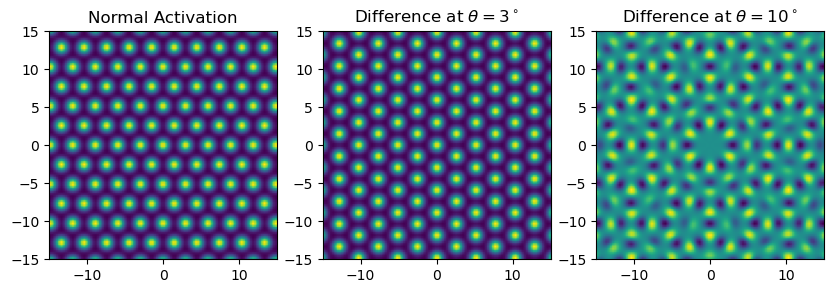

In [155]:
fig, ax = plt.subplots(1,3, figsize=(10,30))

ax[0].imshow(Z1,origin='lower',extent=[-15,15,-15,15])
ax[0].set_title("Normal Activation")

ax[1].imshow(Z2,origin='lower',extent=[-15,15,-15,15])
ax[1].set_title(r"Difference at $\theta=3^\circ$")

ax[2].imshow(Z3,origin='lower',extent=[-15,15,-15,15])
ax[2].set_title(r"Difference at $\theta=10^\circ$")

plt.show()

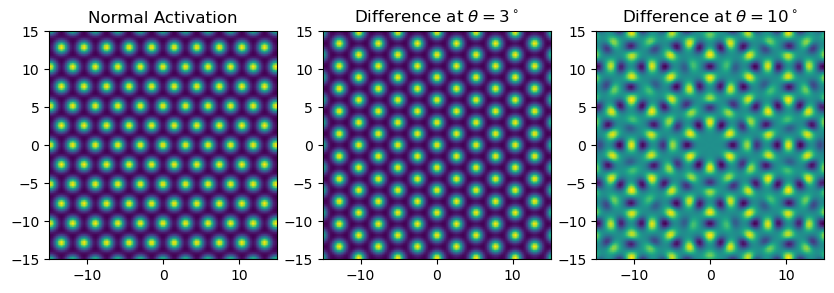

In [156]:
fig, ax = plt.subplots(1,3, figsize=(10,30))

ax[0].imshow(Zcomp1,origin='lower',extent=[-15,15,-15,15])
ax[0].set_title("Normal Activation")

ax[1].imshow(Zcomp2,origin='lower',extent=[-15,15,-15,15])
ax[1].set_title(r"Difference at $\theta=3^\circ$")

ax[2].imshow(Zcomp2-Zcomp1,origin='lower',extent=[-15,15,-15,15])
ax[2].set_title(r"Difference at $\theta=10^\circ$")

plt.show()

In [157]:
Z1-Zcomp1

array([[ 1.06581410e-14,  1.39888101e-14,  1.82631688e-14, ...,
         1.82631688e-14,  1.34336986e-14,  1.25455202e-14],
       [-4.27435864e-15, -1.33226763e-15,  3.83026943e-15, ...,
         4.13558077e-15,  5.06816811e-14, -2.83106871e-15],
       [-4.10782519e-15, -2.63677968e-15,  9.15933995e-16, ...,
         1.04083409e-15, -2.10942375e-15, -3.27515792e-15],
       ...,
       [-3.35842465e-15, -2.13717932e-15,  1.05471187e-15, ...,
         8.74300632e-16, -2.66453526e-15, -4.16333634e-15],
       [ 5.38458167e-14,  4.94049246e-14,  3.83582055e-14, ...,
         3.80806497e-14, -4.32986980e-15,  5.24025268e-14],
       [ 1.23234756e-14,  1.46549439e-14,  1.82631688e-14, ...,
         1.84852134e-14,  1.27675648e-14,  1.04360964e-14]])

### Variation

In [158]:
def define_peak_variables(signal):
    ''' Define the peak of peaks and trough of troughs for further range calculation'''
    peaklocs, _ = sp.signal.find_peaks(signal)
    peaklocs2, _ = sp.signal.find_peaks(signal[peaklocs])
    troughlocs, _ = sp.signal.find_peaks(-signal)
    troughlocs2, _ = sp.signal.find_peaks(-signal[troughlocs])
    return peaklocs, peaklocs2, troughlocs, troughlocs2

def show_theta_var(t=0,dt=0,ax=0, conv=False, verbose=True):
    '''Plots the variation of grid response along the theta=t angle when 
    the grids have a difference in theta of dt'''
    r = np.linspace(-R,R,num_points)
    theta = np.radians(t)
    x = r*np.cos(theta)
    y = r*np.sin(theta)

    X,Y = Lattice(l=1,t0=0,N=N)
    signal = diff_func(x, y, X, Y, -dt, s=s)
    peaklocs, peaklocs2, troughlocs, troughlocs2 = define_peak_variables(signal)

    if conv:
        signal_conv = sp.ndimage.gaussian_filter(signal,sigma=8)
        if ax!=0:
            ax.plot(r,signal_conv)
            ax.set_title(r"along $\theta=$" +f"{t}" +r"$^\circ$at $\Delta\theta=$" +f"{dt}" +r"$^\circ$")
        else:
            plt.plot(r,signal_conv)
            plt.title(r"Smooth Diff of activity along $\theta=$" +f"{t}" +r"$^\circ$at $\Delta\theta=$" +f"{dt}" +r"$^\circ$")
        return r[peaklocs][peaklocs2], r[troughlocs][troughlocs2]

    if verbose:
        print(f"\n For {t} and {dt} Monotonicity of peaks break at {r[peaklocs][peaklocs2]}")
        print(f"Monotonicity of troughs break at {r[troughlocs][troughlocs2]} \n")

    if ax!=0:
        ax.plot(r,signal)
        ax.scatter(r[peaklocs][peaklocs2], signal[peaklocs][peaklocs2], color='r')
        ax.scatter(r[troughlocs][troughlocs2], signal[troughlocs][troughlocs2], color='g')
        ax.set_title(r"along $\theta=$" +f"{t}" +r"$^\circ$ with $\Delta\theta=$" +f"{dt}" +r"$^\circ$")
    else:
        plt.plot(r,signal)
        plt.scatter(r[peaklocs][peaklocs2], signal[peaklocs][peaklocs2], color='r')
        plt.scatter(r[troughlocs][troughlocs2], signal[troughlocs][troughlocs2], color='g')
        plt.title(r"along $\theta=$" +f"{t}" +r"$^\circ$ with $\Delta\theta=$" +f"{dt}" +r"$^\circ$ \n")
    return r[peaklocs][peaklocs2], r[troughlocs][troughlocs2]

ValueError: `x` must be a 1-D array

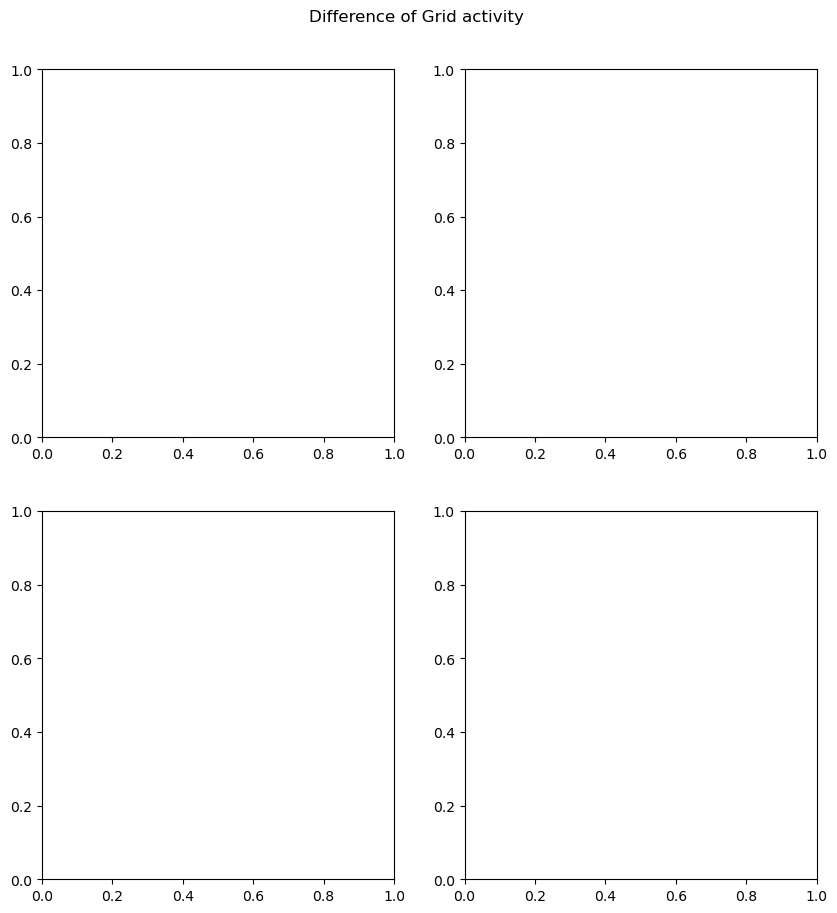

In [159]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.suptitle("Difference of Grid activity")
fig.tight_layout = True
fig.subplots_adjust(top=0.92)

angle = 90
show_theta_var(angle,10, ax[0,0])
show_theta_var(angle,3, ax[0,1])
show_theta_var(angle,10, ax[1,0], conv=True)
show_theta_var(angle,3, ax[1,1], conv=True)
plt.show()